In [1]:
import numpy as np
import imageio
import matplotlib.pyplot as plt
from skimage.transform import resize

In [2]:
test = imageio.get_reader('./data/kth/raw/boxing/person02_boxing_d2_uncomp.avi')

(64, 64, 3)
(64, 64, 3)
(64, 64, 3)
(64, 64, 3)


/home/tao/anaconda3/lib/python3.6/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


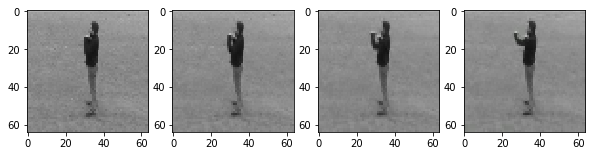

In [3]:
l = test.get_length()
fig, axs = plt.subplots(1, 4, figsize=(10, 8))
for i in range(4):
    img = resize(test.get_data(i), (64, 64), preserve_range=True).astype('uint8')
    print(img.shape)
    axs[i].imshow(img)

In [4]:
print(l)

460


In [2]:
from util import datasets, kth

In [3]:
# v_dataset = datasets.KTHDataset('./data/kth/')
v_dataset = kth.KTH(train=True, data_root='./data', seq_len=20, image_size=64)

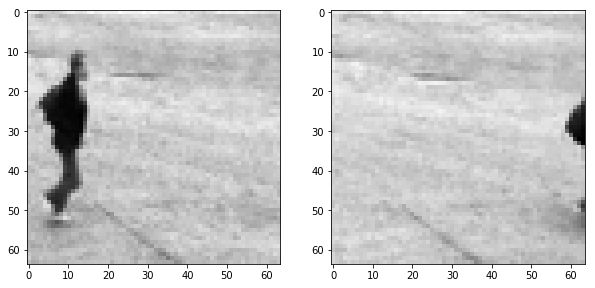

In [6]:
img_1, img_2 = v_dataset[2]
fig, axs = plt.subplots(1, 2, figsize=(10, 8))
axs[0].imshow(img_1.squeeze(), cmap='gray')
axs[1].imshow(img_2.squeeze(), cmap='gray')

In [5]:
img_1.shape

(64, 64, 1)

In [8]:
moving_mnist = np.load('./data/mnist_test_seq.npy').transpose((1, 0, 2, 3))
moving_mnist.shape

(10000, 20, 64, 64)

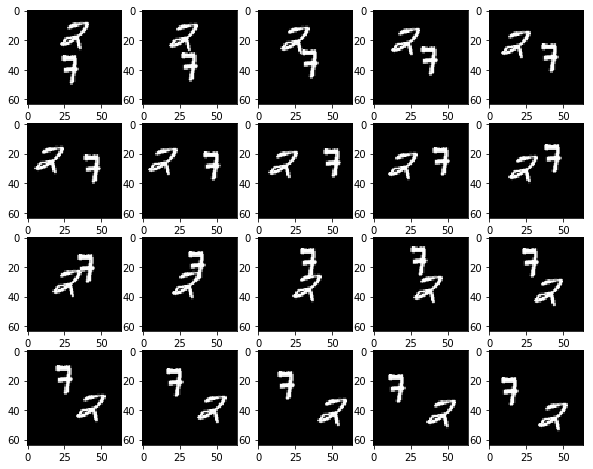

In [9]:
fig, axs = plt.subplots(4, 5, figsize=(10, 8))
for i in range(4):
    for j in range(5):
        axs[i][j].imshow(moving_mnist[0][5*i + j], cmap='gray')

In [10]:
moving_mnist[0][0].max()

255

In [11]:
m_dataset = datasets.MNISTDataset('./data/mnist_test_seq.npy')

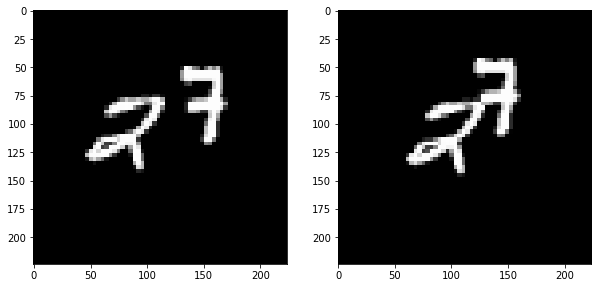

In [12]:
img_1, img_2 = m_dataset[0]
fig, axs = plt.subplots(1, 2, figsize=(10, 8))
axs[0].imshow(img_1, cmap='gray')
axs[1].imshow(img_2, cmap='gray')

In [13]:
from torchvision import transforms
trans = transforms.ToTensor()
m_dataset_tran = datasets.MNISTDataset('./data/mnist_test_seq.npy', transforms=trans)
m_dataset_tran[0][0].shape

torch.Size([1, 224, 224])

In [14]:
m_dataset_tran[0][0].max()

tensor(1.)